In [ ]:
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score as acc
from scipy.stats import multivariate_normal as mvn
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

filePath = "/content/spambase.data"
scalar = StandardScaler()

In [ ]:
df = pd.read_csv(filePath, header = None)

df_x = df.drop(57, axis = 1)
df_y = df[57]
scalar.fit(df_x)
df_x = pd.DataFrame(scalar.transform(df_x))

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size = 0.7)

y_train

1984    0
2435    0
4029    0
3469    0
4586    0
       ..
156     1
2736    0
3138    0
4183    0
44      1
Name: 57, Length: 3220, dtype: int64

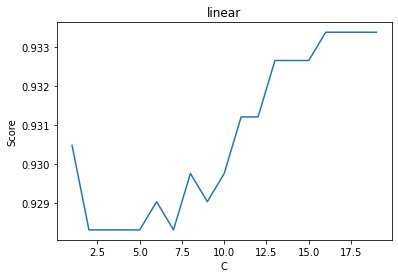

[15, 0.9333816075307748]


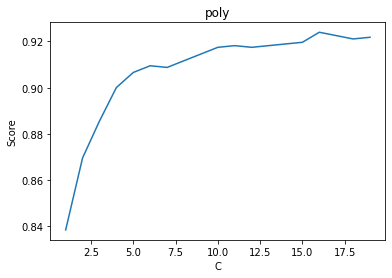

[15, 0.9239681390296887]


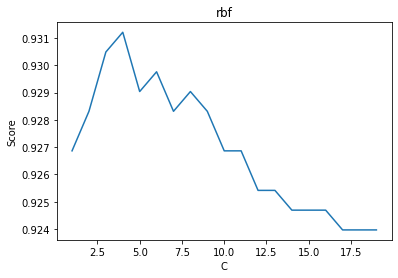

[3, 0.9312092686459088]


In [ ]:
def Find(kernel1):
    accs = []

    for i in range(1, 20):
        model = SVC(kernel = kernel1, degree = 2, C = i)
        model.fit(x_train, y_train)

        acc1 = acc(y_test, model.predict(x_test))
        accs.append(acc1)

    plt.plot(range(1,20), accs)
    plt.xlabel("C")
    plt.ylabel("Score")
    plt.title(kernel1)
    plt.show()
    
    return [accs.index(max(accs)), max(accs)]

linear = Find('linear')
print(linear)
poly = Find('poly')
print(poly)
rbf = Find('rbf')
print(rbf)

In [ ]:
table = pd.DataFrame([linear, poly, rbf], columns = ["Optimum C", "Test Acc"], index = ["Linear", "Quadratic", "RBF"])
table

,Optimum C,Test Acc
Linear,15,0.933382
Quadratic,15,0.923968
RBF,3,0.931209
